## Importing necessary libraries

In [1]:
from featuer_extraction import extract_features_from_info
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load the original data

In [2]:
path_to_data = 'data/ECU_IoHT.xlsx'
data = pd.read_excel(path_to_data)

### Show the first five rows in data

In [3]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing


### the shape of data before extraction of the feature

In [4]:
data.shape

(111207, 9)

### the original columns in the dataset

In [5]:
data.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Type', 'Type of attack'],
      dtype='object')

## Applying the extraction function on `Info` column

In [6]:
df = extract_features_from_info(data)

### Show the first five rows in data after extraction

In [7]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack,source_port,...,tsecr,ws,urg,sack_perm,ttl,seq_ack,ack_num,who_has_ip,tell_ip,rest_of_info
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1,192.168.43.186,
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1 is at 6e:c7:ec:3c:f2:ba
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1,192.168.43.186,
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard query PTR 1.43.168.192.in-addr.arpa
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.168.43.1 is at 6e:c7:ec:3c:f2:ba


### the shape of data after extraction of the feature

In [8]:
df.shape

(111207, 28)

### The columns of dataset after extraction

In [9]:
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Type', 'Type of attack', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr', 'ws',
       'urg', 'sack_perm', 'ttl', 'seq_ack', 'ack_num', 'who_has_ip',
       'tell_ip', 'rest_of_info'],
      dtype='object')

#### Showing only the columns added

In [10]:
new_col = [col for col in df.columns if col not in data.columns]
new_col

['source_port',
 'destination_port',
 'seq',
 'transaction_id',
 'length',
 'win',
 'mss',
 'ack',
 'tsval',
 'tsecr',
 'ws',
 'urg',
 'sack_perm',
 'ttl',
 'seq_ack',
 'ack_num',
 'who_has_ip',
 'tell_ip',
 'rest_of_info']

## Data Cleaning

### columns to drop

In [11]:
columns_to_drop = ['No.', 'Info', 'rest_of_info']
df = df.drop(columns_to_drop, axis= 1)
df.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Type',
       'Type of attack', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr', 'ws',
       'urg', 'sack_perm', 'ttl', 'seq_ack', 'ack_num', 'who_has_ip',
       'tell_ip'],
      dtype='object')

### drop the columns with inferior to 1000 not null value 

In [12]:
cols_not_null_inferior1000 = df.loc[:,df.notna().sum() <= 1000].columns
print("the columns with the value of not null inferior to 1000:")
cols_not_null_inferior1000.to_list()

the columns with the value of not null inferior to 1000:


['ws', 'urg', 'sack_perm', 'seq_ack', 'ack_num']

In [13]:
print('Showing how much NULL values in those columns.')
df[cols_not_null_inferior1000].isnull().sum()

Showing how much NULL values in those columns.


ws           110805
urg          111198
sack_perm    110805
seq_ack      110998
ack_num      110998
dtype: int64

#### drop these columns

In [14]:
df_cleaned1 = df.drop(cols_not_null_inferior1000, axis=1)
print('shape of data frame before droping the columns: ', df.shape)
print('shape of data frame after droping the columns: ', df_cleaned1.shape)

shape of data frame before droping the columns:  (111207, 25)
shape of data frame after droping the columns:  (111207, 20)


### Encoding the categorical columns 

In [15]:
numerical_columns = df_cleaned1.select_dtypes(include=['number']).columns
categorical_columns = df_cleaned1.select_dtypes(include=['object']).columns
print("Numerical columns:")
print(numerical_columns)

print("\nCategorical columns:")
print(categorical_columns)

Numerical columns:
Index(['Time', 'Length', 'source_port', 'destination_port', 'seq',
       'transaction_id', 'length', 'win', 'mss', 'ack', 'tsval', 'tsecr',
       'ttl'],
      dtype='object')

Categorical columns:
Index(['Source', 'Destination', 'Protocol', 'Type', 'Type of attack',
       'who_has_ip', 'tell_ip'],
      dtype='object')


#### encoding the four columns that has IP address

In [16]:
columns_have_ip = ['Source', 'Destination', 'who_has_ip', 'tell_ip']

In [17]:
IP_sets = [set(df_cleaned1[col].unique()) for col in columns_have_ip]
for IP_set, col in zip(IP_sets, columns_have_ip):
    print(f'The {col} column contains repetitions of {len(IP_set)} unique IP addresses.')

The Source column contains repetitions of 69 unique IP addresses.
The Destination column contains repetitions of 71 unique IP addresses.
The who_has_ip column contains repetitions of 256 unique IP addresses.
The tell_ip column contains repetitions of 3 unique IP addresses.


In [18]:
for IP_set1, col1 in zip(IP_sets, columns_have_ip):
    for IP_set2, col2 in zip(IP_sets, columns_have_ip):  
        if col1 != col2:
            print(f'the common IPs between "{col1}" and "{col2}" are {len(IP_set1 & IP_set2)}')

the common IPs between "Source" and "Destination" are 69
the common IPs between "Source" and "who_has_ip" are 3
the common IPs between "Source" and "tell_ip" are 2
the common IPs between "Destination" and "Source" are 69
the common IPs between "Destination" and "who_has_ip" are 3
the common IPs between "Destination" and "tell_ip" are 2
the common IPs between "who_has_ip" and "Source" are 3
the common IPs between "who_has_ip" and "Destination" are 3
the common IPs between "who_has_ip" and "tell_ip" are 3
the common IPs between "tell_ip" and "Source" are 2
the common IPs between "tell_ip" and "Destination" are 2
the common IPs between "tell_ip" and "who_has_ip" are 3


In [22]:
all_IPs = IP_sets[0] | IP_sets[1] | IP_sets[2] | IP_sets[3]
print(f'all IP adresses in the dataset: {len(all_IPs)}')

all IP adresses in the dataset: 324


##### Create an encoder that assigns a unique number to each IP.

In [35]:
ip_to_num = {
    ip: i for i, ip in enumerate(all_IPs) 
}
ip_to_num[np.nan] = np.nan

In [36]:
ip_to_num[np.nan]

nan

##### Applying this encoder

In [37]:
for col in columns_have_ip:
    df_cleaned1[col] = df_cleaned1[col].apply(lambda ip: ip_to_num[ip])

In [38]:
df_cleaned1[columns_have_ip].dtypes

Source           int64
Destination      int64
who_has_ip     float64
tell_ip        float64
dtype: object

All IP addresses have been changed to numeric form

#### Encoding the remaining columns.

In [39]:
resr_categorical_columns = df_cleaned1.select_dtypes(include=['object']).columns
print(f"the remaining columns that need to be encoded:\n{resr_categorical_columns.to_list()}")

the remaining columns that need to be encoded:
['Protocol', 'Type', 'Type of attack']


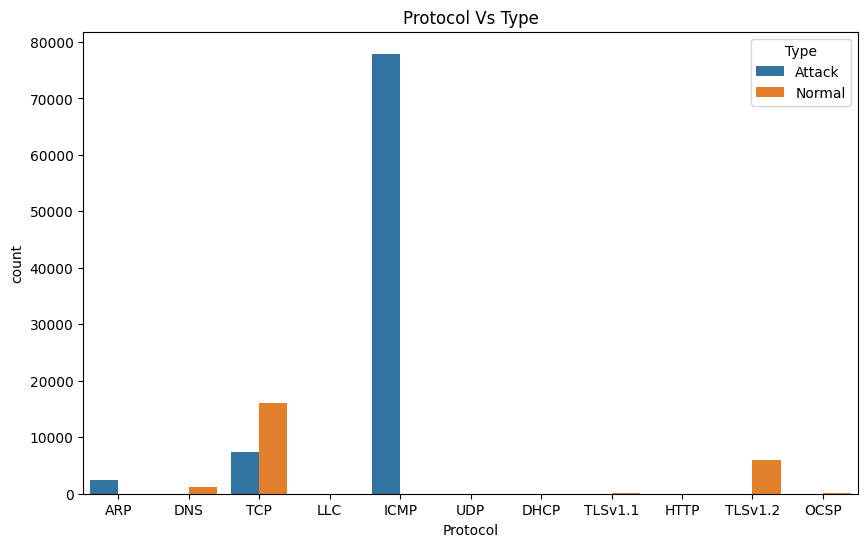

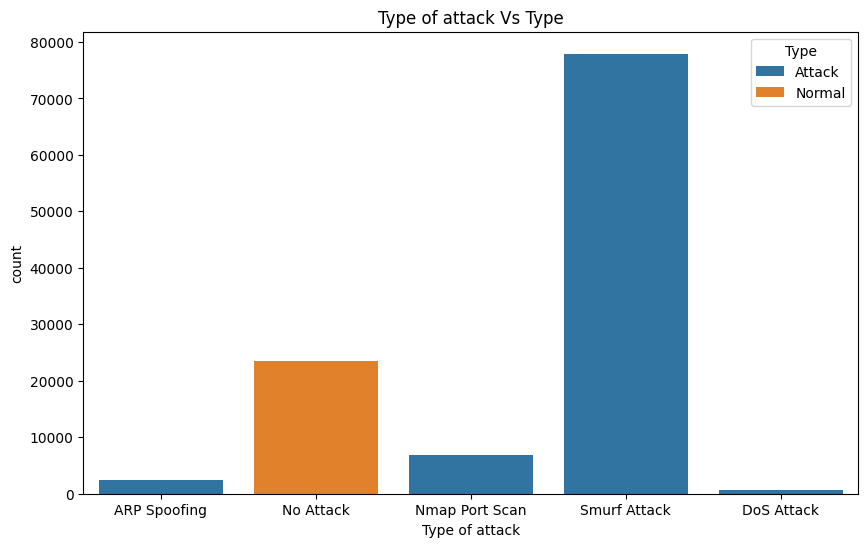

In [40]:
for column in resr_categorical_columns:
    if column != 'Type':
        plt.figure(figsize=(10,6))
        sns.countplot(x=column, hue='Type', data= data)
        plt.title(f'{column} Vs Type')
        plt.show()

ARP Spoofing, Nmap Port Scan, Smurf Attack, and DoS Attack are all types of attacks. 'No Attack' defines normal. This means that the 'Type of Attack' and 'Type' columns have the same functionality, and we will keep the 'Type' column, which is more logical.

In [41]:
df_cleaned1 = df_cleaned1.drop(['Type of attack'], axis=1)

##### Use one hot encoder on the Protocol column

In [42]:
df_cleaned1['Protocol'].unique()

array(['ARP', 'DNS', 'TCP', 'LLC', 'ICMP', 'UDP', 'DHCP', 'TLSv1.1',
       'HTTP', 'TLSv1.2', 'OCSP'], dtype=object)

In [43]:
encoded_data = pd.get_dummies(df_cleaned1, columns=['Protocol'], dtype= np.int32)

print(encoded_data.columns)

Index(['Time', 'Source', 'Destination', 'Length', 'Type', 'source_port',
       'destination_port', 'seq', 'transaction_id', 'length', 'win', 'mss',
       'ack', 'tsval', 'tsecr', 'ttl', 'who_has_ip', 'tell_ip', 'Protocol_ARP',
       'Protocol_DHCP', 'Protocol_DNS', 'Protocol_HTTP', 'Protocol_ICMP',
       'Protocol_LLC', 'Protocol_OCSP', 'Protocol_TCP', 'Protocol_TLSv1.1',
       'Protocol_TLSv1.2', 'Protocol_UDP'],
      dtype='object')


In [44]:
len(encoded_data.columns)

29

##### Use label encoder on the Type column

In [45]:
type_encoder = {'Attack': 1, 'Normal': 0}
type_encoder_inverse = {v:k for k, v in type_encoder.items()}
encoded_data['Type'] = encoded_data['Type'].map(type_encoder)

In [46]:
encoded_data['Type'].unique(), type_encoder_inverse

(array([1, 0]), {1: 'Attack', 0: 'Normal'})

In [47]:
len(encoded_data.select_dtypes(include=['number']).columns)

29

### Missing values

#### Ploting the correlation matrix

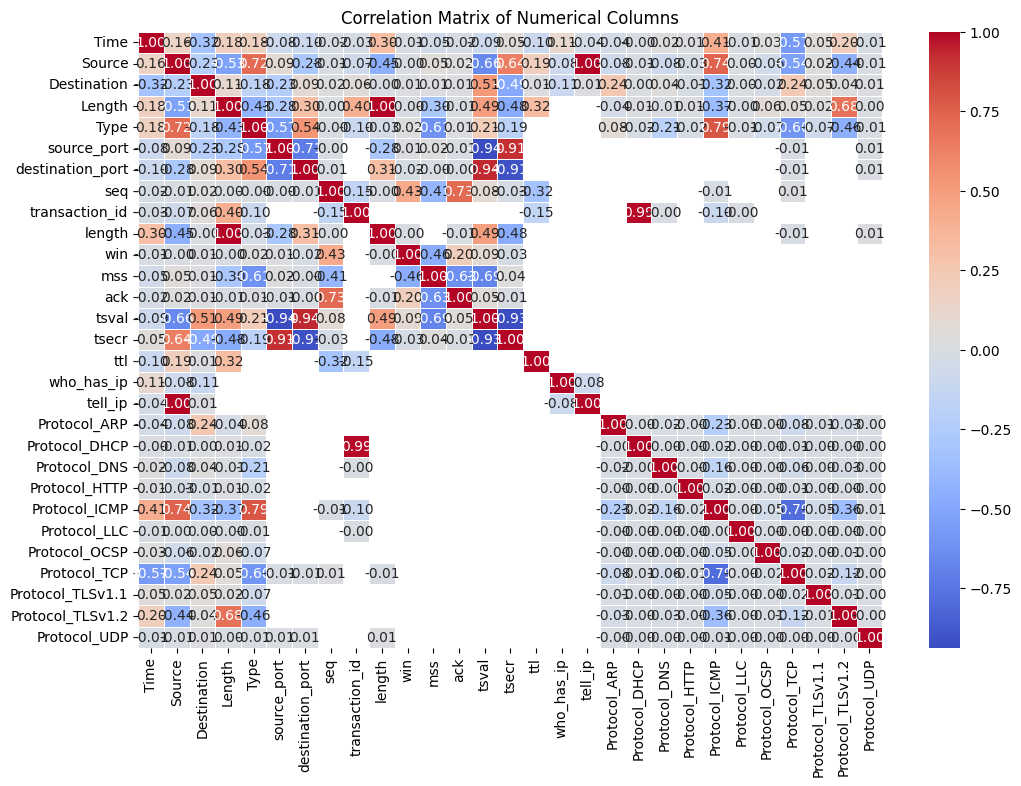

In [ ]:

correlation_matrix = encoded_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [56]:
columns_to_drop = ['length', 'Protocol_UDP', 'tell_ip', 'transaction_id', 'Protocol_TLSv1.1']
encoded_df = encoded_data.drop(columns_to_drop, axis=1)

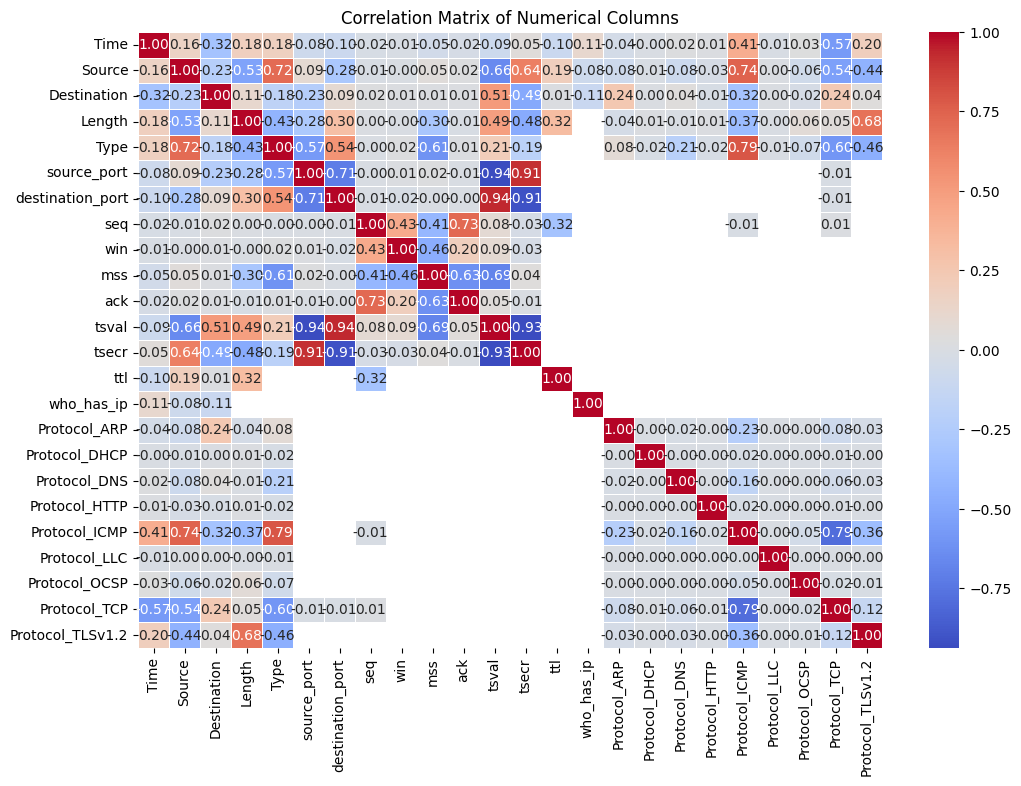

In [58]:
correlation_matrix = encoded_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

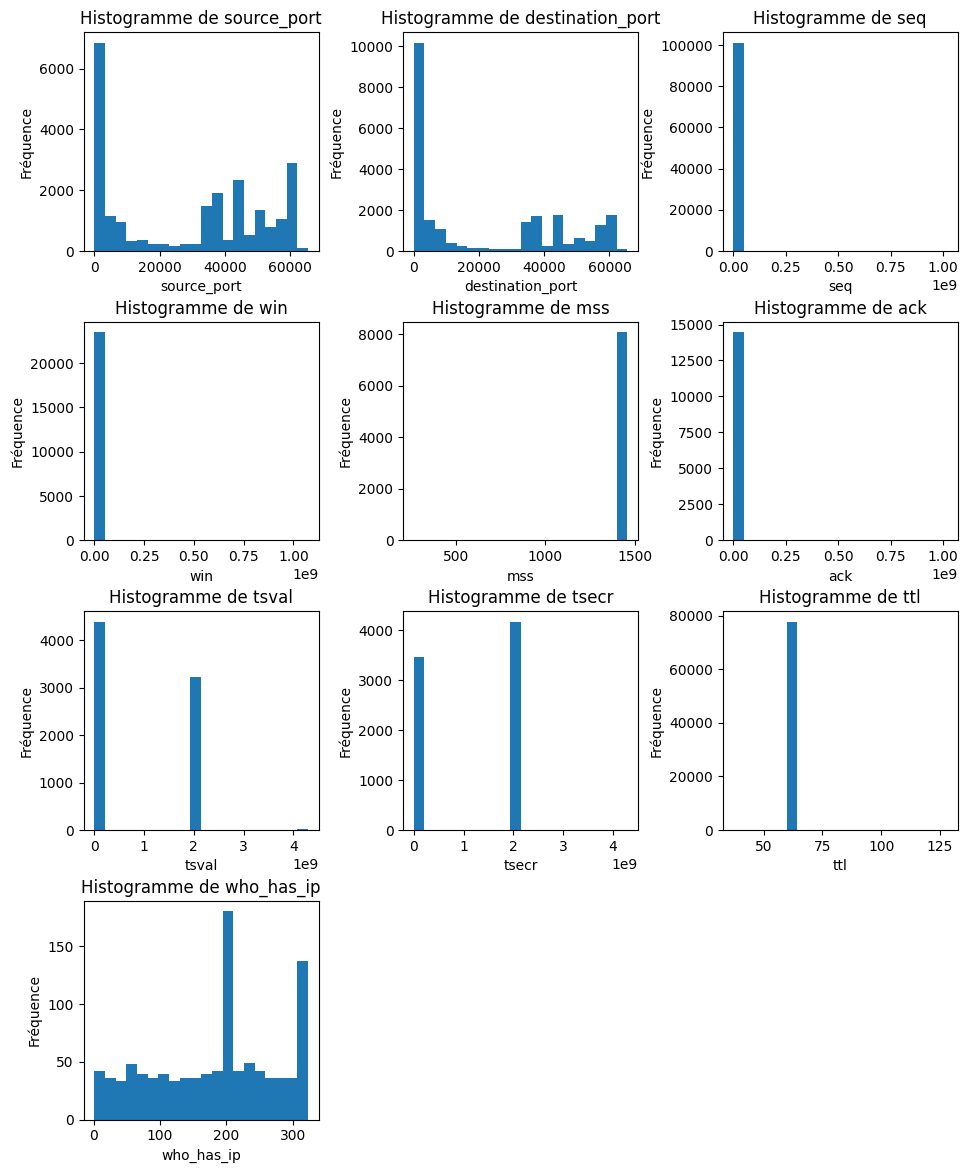

In [62]:
df = encoded_df.copy()
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols[encoded_df.isna().any()]

num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 3 * num_rows))
fig.tight_layout(pad=3.0)

for i, col in enumerate(numerical_cols):
  row = i // 3
  col_idx = i % 3
  ax = axes[row, col_idx]
  ax.hist(df[col], bins=20)
  ax.set_title(f'Histogramme de {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Fréquence')

for i in range(num_cols, num_rows * 3):
  row = i // 3
  col_idx = i % 3
  fig.delaxes(axes[row, col_idx])

plt.show()

In [65]:
numerical_cols = encoded_df.select_dtypes(include=np.number).columns
columns_has_null = numerical_cols[encoded_df.isna().any()]
columns_has_null

Index(['source_port', 'destination_port', 'seq', 'win', 'mss', 'ack', 'tsval',
       'tsecr', 'ttl', 'who_has_ip'],
      dtype='object')

In [66]:
method_columns = {
    'median':['source_port', 'destination_port', 'seq', 'win', 'mss'],  
    'mean':['ack', 'tsval', 'tsecr', 'ttl', 'who_has_ip']
}

In [69]:
for method, columns in method_columns.items():
    if method == 'median':
        for column in columns:
            encoded_df[column] = encoded_df[column].fillna(encoded_df[column].median())
    elif method == 'mean':
        for column in columns:
            encoded_df[column] = encoded_df[column].fillna(encoded_df[column].mean())

In [70]:
numerical_cols[encoded_df.isna().any()]

Index([], dtype='object')

## Dimensionality reduction

In [92]:
X = encoded_df.drop(columns=['Type', 'tsval', 'tsecr'])
labels = encoded_df['Type']

### Applying PCA

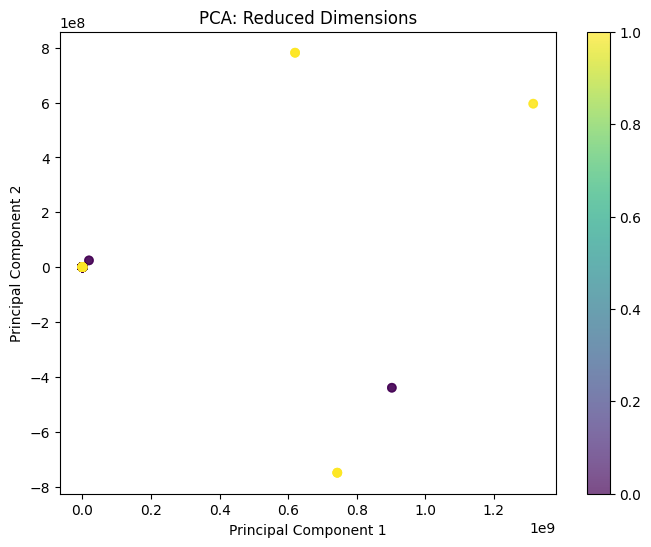

Explained Variance Ratio: [0.55893258 0.34240791]


In [93]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

# Plot the reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)  # Replace 'labels' with your data labels
plt.title("PCA: Reduced Dimensions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


In [94]:
from sklearn.decomposition import PCA

# Application de l'ACP
pca = PCA()
principalComponents = pca.fit_transform(X)

# Affichage des ratios de variance expliquée pour chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
print("Ratio de variance expliquée pour chaque composante principale :")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Composante principale {i+1}: {ratio:.4f}")

Ratio de variance expliquée pour chaque composante principale :
Composante principale 1: 0.5589
Composante principale 2: 0.3424
Composante principale 3: 0.0987
Composante principale 4: 0.0000
Composante principale 5: 0.0000
Composante principale 6: 0.0000
Composante principale 7: 0.0000
Composante principale 8: 0.0000
Composante principale 9: 0.0000
Composante principale 10: 0.0000
Composante principale 11: 0.0000
Composante principale 12: 0.0000
Composante principale 13: 0.0000
Composante principale 14: 0.0000
Composante principale 15: 0.0000
Composante principale 16: 0.0000
Composante principale 17: 0.0000
Composante principale 18: 0.0000
Composante principale 19: 0.0000
Composante principale 20: 0.0000
Composante principale 21: 0.0000


### Plot the explained variance ratio

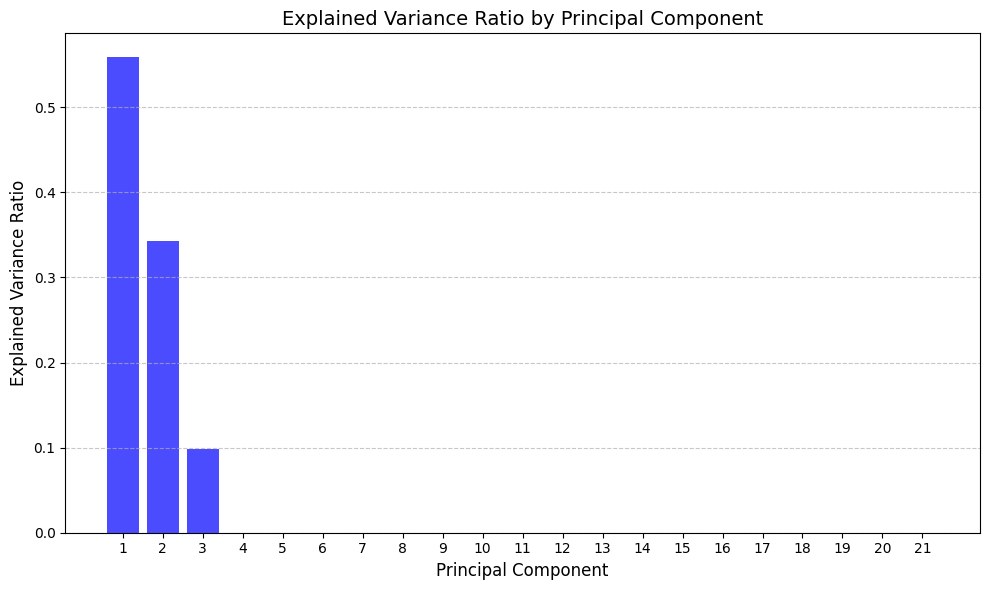

In [95]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='b')

# Add labels and title
plt.title("Explained Variance Ratio by Principal Component", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Label each component
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

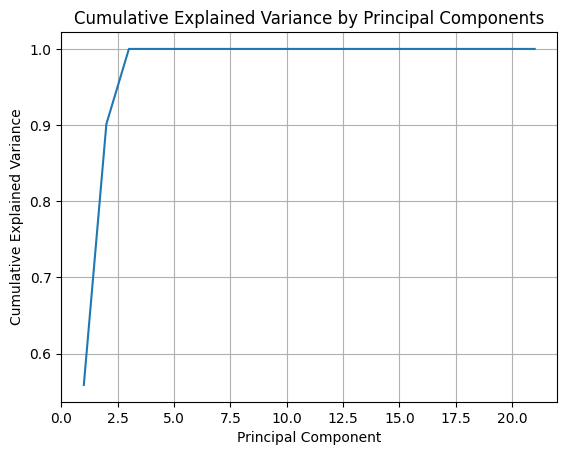

In [96]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.grid(True)
plt.show()

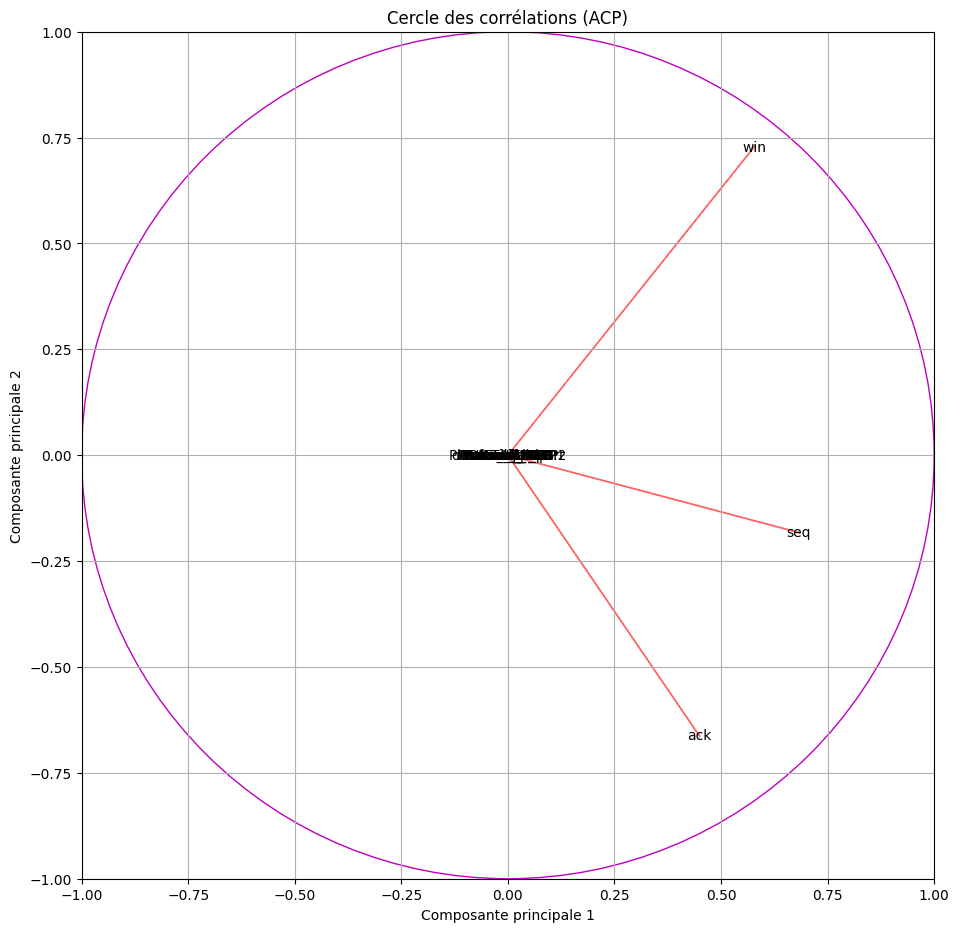

In [97]:
# Affichage du cercle des corrélations
fig, axes = plt.subplots(figsize=(11, 11))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Cercle unité
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='m')
axes.add_artist(circle)

# Afficher les coordonnées des variables sur le cercle des corrélations
for i, variable in enumerate(X.columns):
    x = pca.components_[0, i]
    y = pca.components_[1, i]
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x, y, variable,  ha='center', va='center')

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Cercle des corrélations (ACP)")
plt.grid(True)
plt.show()

### Applying t-SNE

In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)  # Common parameters: perplexity and n_iter
X_tsne = tsne.fit_transform(X)

# Plot the reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)  # Replace 'labels' with your data labels
plt.title("t-SNE: Reduced Dimensions")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar()
plt.show()


c:\Users\lenovo\Desktop\ENSIAS S3\visualization_and_reduction_of_dimension\project\IoHT-data-Analyses\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


### Applying UMAP

In [ ]:
import umap
import matplotlib.pyplot as plt

# Reduce dimensions using UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot the reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', alpha=0.7)  # Replace 'labels' with your data labels
plt.title("UMAP: Reduced Dimensions")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar()
plt.show()